In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

### Creating a simple linear regression dataset with only one feature & one label

In [2]:
x = 6 * np.random.rand(200,1) - 3
y = 0.9*x**2 + 0.8*x + 3 + np.random.rand(200,1)

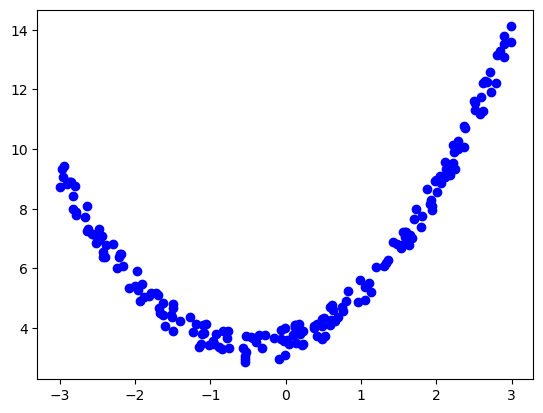

In [3]:
# plt.scatter(x,y)
plt.plot(x,y,'bo')

In [4]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

### Applying Normal Linear Regression to the Non-Linear data

In [5]:
linear_reg = LinearRegression()

In [6]:
linear_reg.fit(X_train,y_train)

LinearRegression()

In [7]:
linear_reg.coef_

array([[0.75589345]])

In [8]:
linear_reg.intercept_

array([6.49295131])

In [9]:
y_pred = linear_reg.predict(X_test)

In [10]:
from sklearn.metrics import r2_score

In [11]:
r2_score(y_test,y_pred)

0.252744267366667

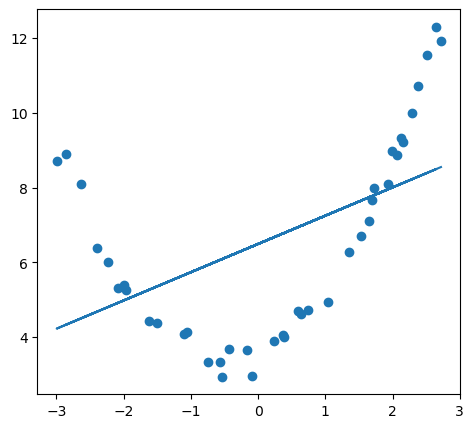

In [12]:
fig = plt.figure(figsize=(12,5))
ax1 = plt.subplot(1,2,1)
ax1.scatter(X_test,y_test)
ax1.plot(X_test,y_pred)

### Using Polynomialfeatures to transform the data into multiple degree

In [123]:
poly = PolynomialFeatures(degree=2, include_bias=True)

In [124]:
X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [15]:
X_train[0]

array([0.51179987])

In [16]:
X_train_trans[0]

array([1.        , 0.51179987, 0.2619391 ])

In [17]:
X_test[0]

array([0.38075083])

In [18]:
X_test_trans[0]

array([1.        , 0.38075083, 0.14497119])

In [126]:
poly.n_features_in_

1

In [125]:
poly.n_output_features_

3

### Training the model using LinearRegression class

In [127]:
poly_lin_reg = LinearRegression()

In [128]:
poly_lin_reg.fit(X_train_trans,y_train)

LinearRegression()

In [129]:
y_pred = poly_lin_reg.predict(X_test_trans)

In [130]:
r2_score(y_test,y_pred)

0.9883327785976002

### Visualizing the Polynomial regression

### preparing new unseen data for prediction

In [25]:
X_new=np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = poly_lin_reg.predict(X_new_poly)

In [29]:
X_new_poly[0]

array([ 1., -3.,  9.])

In [30]:
X_new[0]

array([-3.])

In [32]:
y_new[0]

array([9.22059929])

In [36]:
X_new.shape

(200, 1)

In [42]:
import seaborn as sns

<Axes: ylabel='Density'>

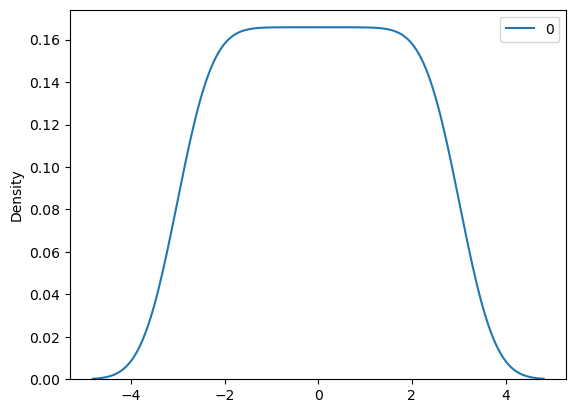

In [43]:
sns.kdeplot(X_new)

In [37]:
y_new.shape

(200, 1)

<Axes: ylabel='Density'>

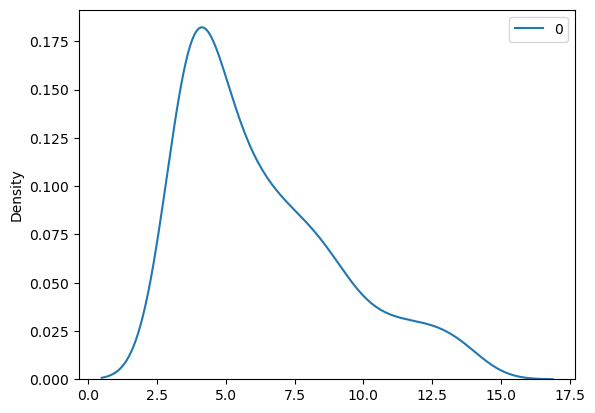

In [44]:
sns.kdeplot(y_new)

In [49]:
# sns.distplot(X_new)

In [38]:
X_test.shape

(40, 1)

<Axes: ylabel='Density'>

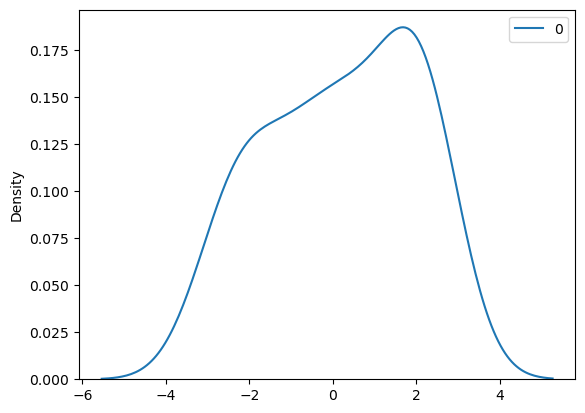

In [47]:
sns.kdeplot(X_test)

In [39]:
y_pred.shape

(40, 1)

<Axes: ylabel='Density'>

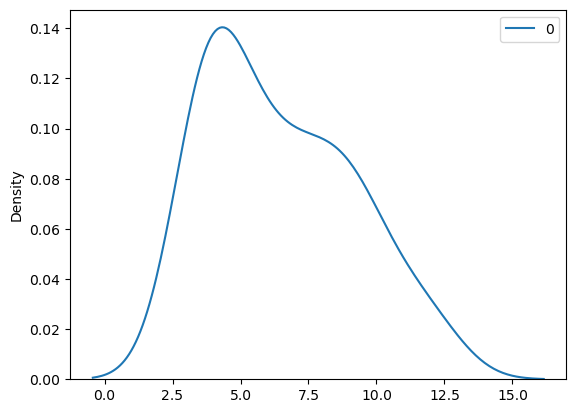

In [51]:
sns.kdeplot(y_pred)

<Axes: ylabel='Count'>

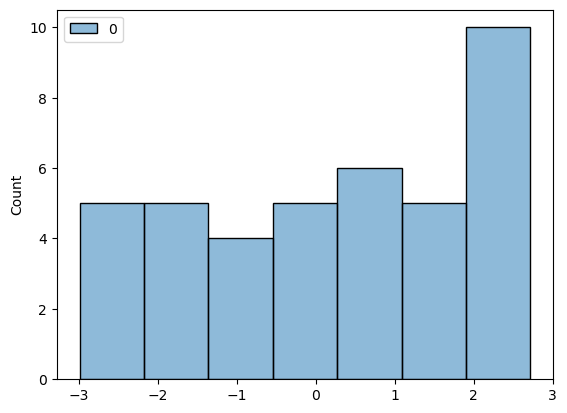

In [53]:
sns.histplot(X_test)

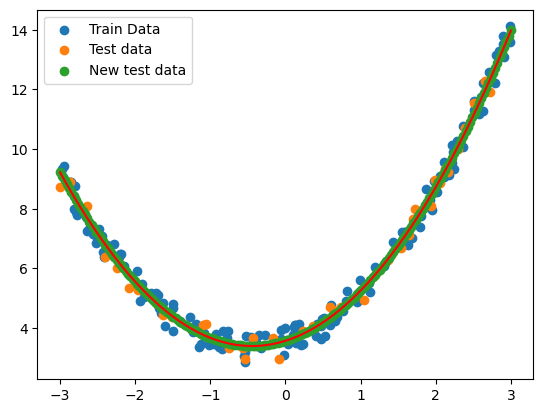

In [70]:
plt.plot(X_new,y_new,'r-')
plt.scatter(X_train,y_train, label='Train Data')
plt.scatter(X_test,y_test, label='Test data')
plt.scatter(X_new,y_new,label='New test data')
plt.legend()

### Finding the best Polynomial Regression Line with Automation

In [173]:
r2score = []
def getBestModel(degree,X_train, y_train, X_test, y_test):
    poly = PolynomialFeatures(degree, include_bias=False)
    
    X_train_trans = poly.fit_transform(X_train)
    X_test_trans = poly.transform(X_test)
    
    linear = LinearRegression()
    linear.fit(X_train_trans,y_train)
    
    y_pred = linear.predict(X_test_trans)
    
    r2 = r2_score(y_test,y_pred)
    return r2

In [174]:
degree = 2
while True:
    r2 = getBestModel(degree = degree, X_train = X_train, y_train = y_train, X_test=X_test, y_test=y_test)
    
    if r2 < 0.8:
        break
        
    print(f'r2_score {r2} at degree{degree}')
    
    r2score.append(r2)
    
    degree = degree + 1

r2_score 0.9883327785976002 at degree2
r2_score 0.9882541523722786 at degree3
r2_score 0.9883425219030358 at degree4
r2_score 0.9883943709985806 at degree5
r2_score 0.9883128109570711 at degree6
r2_score 0.9875325700833435 at degree7
r2_score 0.9861417138774359 at degree8
r2_score 0.9832966604533868 at degree9
r2_score 0.9833073105093789 at degree10
r2_score 0.9834350467330119 at degree11
r2_score 0.9834748920317737 at degree12
r2_score 0.9834921740162801 at degree13
r2_score 0.9839207041070721 at degree14
r2_score 0.9840483417285827 at degree15
r2_score 0.9839131743059075 at degree16
r2_score 0.983753884358472 at degree17
r2_score 0.9839667336866244 at degree18
r2_score 0.9838461794164957 at degree19
r2_score 0.9839888644439554 at degree20
r2_score 0.9841141800163914 at degree21
r2_score 0.9844689598502433 at degree22
r2_score 0.9848400709847185 at degree23
r2_score 0.9833304422941871 at degree24
r2_score 0.9818972330430709 at degree25
r2_score 0.9829865064026208 at degree26
r2_score 

In [141]:
degrees = np.arange(2,648)
print(len(degrees))
r2 = np.array(r2score)

646


In [155]:
# degrees_1 = degrees

In [157]:
# r2_1 = r2

In [163]:
# r2_1

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

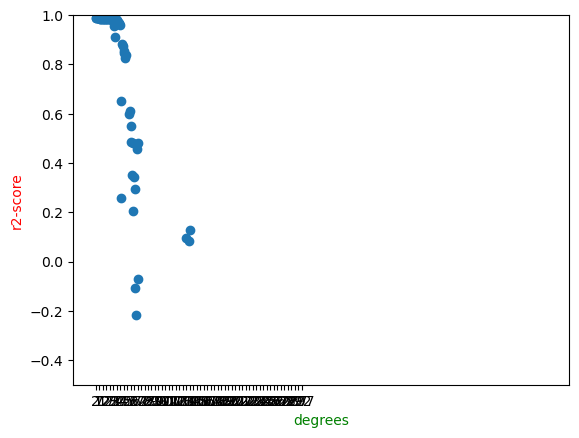

In [170]:
plt.scatter(degrees, r2)
plt.xlabel('degrees',c='g')
plt.ylabel('r2-score', c='r')
plt.ylim([-0.5,1])
# plt.xlim([2,500])
plt.xticks(np.arange(2, 300, 5))
plt.tight_layout